<a href="https://colab.research.google.com/github/Miyaputri/Statistika-Multivariat/blob/main/Analisis_Pengaruh_Jenis_Kawasan_Berdasarkan_Kualitas_Udara_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Pengaruh Jenis Kawasan Berdasarkan Kualitas Udara menggunakan analisis MANOVA


## Import Package & Data

In [2]:
pip install statsmodels

In [3]:
#Install Library
!pip install pingouin

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 204.4/204.4 kB 15.1 MB/s eta 0:00:00


In [4]:
#Import Library
import numpy as np
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import itertools
import pingouin as pg
from scipy.spatial.distance import mahalanobis
from numpy.linalg import inv
from scipy.stats import chi2
from sklearn.covariance import MinCovDet
from statsmodels.multivariate.manova import MANOVA

In [5]:
import pandas as pd

url = "https://raw.githubusercontent.com/Miyaputri/Statistika-Multivariat/refs/heads/main/data_polusi.csv"
df = pd.read_csv(url)

print(df.head())  # Tampilkan 5 baris pertama

         CO2        NO2       SO2       PM25   kawasan
0   9.954514   5.373383  6.286056  11.148864  Industri
1  11.972879   5.417220  4.884665  12.694457  Industri
2  10.767077   9.907032  5.201195  12.143964  Industri
3   5.276853   8.614247  4.573820  14.492883  Industri
4  10.713013  11.529852  4.426187  13.599463  Industri


In [8]:
df

,CO2,NO2,SO2,PM25,kawasan
0,9.954514,5.373383,6.286056,11.148864,Industri
1,11.972879,5.417220,4.884665,12.694457,Industri
2,10.767077,9.907032,5.201195,12.143964,Industri
3,5.276853,8.614247,4.573820,14.492883,Industri
4,10.713013,11.529852,4.426187,13.599463,Industri
...,...,...,...,...,...
145,5.877982,0.699739,5.301447,6.840413,Hutan
146,5.440684,5.301798,2.179815,6.333288,Hutan
147,3.811057,2.691455,1.454872,6.680047,Hutan
148,6.895944,2.940021,1.381440,5.540484,Hutan


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CO2      150 non-null    float64
 1   NO2      150 non-null    float64
 2   SO2      150 non-null    float64
 3   PM25     150 non-null    float64
 4   kawasan  150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


## Manova

### Uji Normalitas Multivariat

In [ ]:
data_Industri = df.loc[df['kawasan']=='Industri', ['CO2', 'NO2', 'SO2', 'PM25']]
data_Permukiman = df.loc[df['kawasan']=='Permukiman', ['CO2', 'NO2', 'SO2', 'PM25']]
data_Hutan = df.loc[df['kawasan']=='Hutan', ['CO2', 'NO2', 'SO2', 'PM25']]

In [ ]:
print('uji normalitas multivariat Industri: ', pg.multivariate_normality(data_Industri, alpha=0.05))
print('uji normalitas multivariat Permukiman : ', pg.multivariate_normality(data_Permukiman, alpha=0.05))
print('uji normalitas multivariat Hutan: ', pg.multivariate_normality(data_Hutan, alpha=0.05))

uji normalitas multivariat Industri:  HZResults(hz=np.float64(0.7559130321720848), pval=np.float64(0.5012168370946236), normal=True)
uji normalitas multivariat Permukiman :  HZResults(hz=np.float64(0.8025436136811368), pval=np.float64(0.33323063067207104), normal=True)
uji normalitas multivariat Hutan:  HZResults(hz=np.float64(0.7960073754366765), pval=np.float64(0.35505411920488494), normal=True)


Semua variabel data sudah berdistribusi normal multivariat, sehingga kita tidak perlu menerapkan transformasi data

### Uji Homogenitas

In [ ]:
#Gabungkan lagi datanya
data_manova = pd.concat([data_Industri, data_Permukiman, data_Hutan])
data_manova['kawasan'] = df['kawasan'].copy()
data_manova

,CO2,NO2,SO2,PM25,kawasan
0,9.954514,5.373383,6.286056,11.148864,Industri
1,11.972879,5.417220,4.884665,12.694457,Industri
2,10.767077,9.907032,5.201195,12.143964,Industri
3,5.276853,8.614247,4.573820,14.492883,Industri
4,10.713013,11.529852,4.426187,13.599463,Industri
...,...,...,...,...,...
145,5.877982,0.699739,5.301447,6.840413,Hutan
146,5.440684,5.301798,2.179815,6.333288,Hutan
147,3.811057,2.691455,1.454872,6.680047,Hutan
148,6.895944,2.940021,1.381440,5.540484,Hutan


In [ ]:
# Uji homogenitas
pg.box_m(df, dvs=['CO2', 'NO2', 'SO2', 'PM25'], group='kawasan')

,Chi2,df,pval,equal_cov
box,14.604881,20.0,0.798552,True


Karena pval > 0.05, maka data homogen

### Manova

In [ ]:
manova_model = MANOVA.from_formula('CO2 + NO2 + SO2 + PM25 ~ kawasan', data=df)
manova_results = manova_model.mv_test()
print(manova_results)

                  Multivariate linear model
                                                              
--------------------------------------------------------------
       Intercept        Value  Num DF  Den DF  F Value  Pr > F
--------------------------------------------------------------
          Wilks' lambda 0.1378 4.0000 144.0000 225.3065 0.0000
         Pillai's trace 0.8622 4.0000 144.0000 225.3065 0.0000
 Hotelling-Lawley trace 6.2585 4.0000 144.0000 225.3065 0.0000
    Roy's greatest root 6.2585 4.0000 144.0000 225.3065 0.0000
--------------------------------------------------------------
                                                              
--------------------------------------------------------------
         kawasan         Value  Num DF  Den DF  F Value Pr > F
--------------------------------------------------------------
           Wilks' lambda 0.3375 8.0000 288.0000 25.9682 0.0000
          Pillai's trace 0.6738 8.0000 290.0000 18.4190 0.0000
  Hotelling

Semua statistik di atas menunjukkan hasil yang sangat signifikan (p < 0.001). Artinya, ada perbedaan yang signifikan secara multivariat antara kawasan Hutan, Industri, dan Permukiman.

### Uji post hoc

In [ ]:
tukey_CO2 = pg.pairwise_tukey(data=df, dv='CO2', between='kawasan')
print("Tukey Post-hoc untuk variabel CO2")
tukey_CO2

Tukey Post-hoc untuk variabel CO2


,A,B,mean(A),mean(B),diff,se,T,p-tukey,hedges
0,Hutan,Industri,5.730716,9.967484,-4.236768,0.440288,-9.622728,2.153833e-14,-1.950119
1,Hutan,Permukiman,5.730716,8.200395,-2.469679,0.440288,-5.609241,2.927515e-07,-1.046026
2,Industri,Permukiman,9.967484,8.200395,1.767088,0.440288,4.013487,2.787369e-04,0.835780


In [ ]:
tukey_NO2 = pg.pairwise_tukey(data=df, dv='NO2', between='kawasan')
print("Tukey Post-hoc untuk variabel NO2")
tukey_NO2

Tukey Post-hoc untuk variabel NO2


,A,B,mean(A),mean(B),diff,se,T,p-tukey,hedges
0,Hutan,Industri,4.052777,8.209434,-4.156657,0.377294,-11.017010,2.153833e-14,-2.252608
1,Hutan,Permukiman,4.052777,5.746183,-1.693406,0.377294,-4.488287,4.267116e-05,-0.875951
2,Industri,Permukiman,8.209434,5.746183,2.463251,0.377294,6.528724,3.030384e-09,1.280630


In [ ]:
tukey_SO2 = pg.pairwise_tukey(data=df, dv='SO2', between='kawasan')
print("Tukey Post-hoc untuk variabel SO2")
tukey_SO2

Tukey Post-hoc untuk variabel SO2


,A,B,mean(A),mean(B),diff,se,T,p-tukey,hedges
0,Hutan,Industri,2.859736,5.252713,-2.392978,0.344224,-6.951814,3.280786e-10,-1.416955
1,Hutan,Permukiman,2.859736,3.874466,-1.014730,0.344224,-2.947882,1.034607e-02,-0.592964
2,Industri,Permukiman,5.252713,3.874466,1.378247,0.344224,4.003931,2.890096e-04,0.765210


In [ ]:
tukey_PM25 = pg.pairwise_tukey(data=df, dv='PM25', between='kawasan')
print("Tukey Post-hoc untuk variabel PM25")
tukey_PM25

Tukey Post-hoc untuk variabel PM25


,A,B,mean(A),mean(B),diff,se,T,p-tukey,hedges
0,Hutan,Industri,7.249414,12.180437,-4.931023,0.462256,-10.667287,2.153833e-14,-2.129924
1,Hutan,Permukiman,7.249414,9.751262,-2.501848,0.462256,-5.412251,7.393292e-07,-1.017706
2,Industri,Permukiman,12.180437,9.751262,2.429175,0.462256,5.255037,1.525943e-06,1.100566


Dari uji post-hoc ternyata semuanya berbeda signifikan

### Visualisasi Data

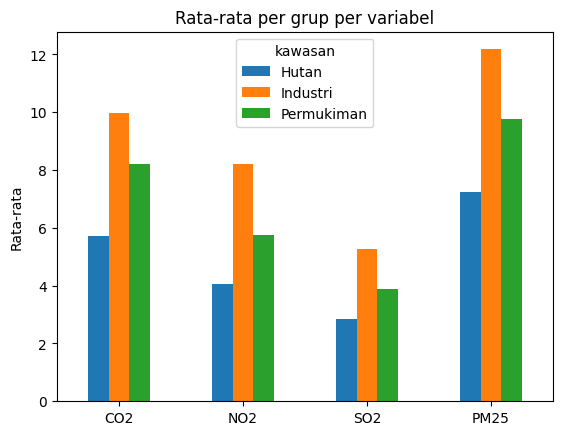

In [ ]:
data_manova.groupby('kawasan')[['CO2', 'NO2', 'SO2', 'PM25']].mean().T.plot(kind='bar')
plt.title("Rata-rata per grup per variabel")
plt.ylabel('Rata-rata')
plt.xticks(rotation=0)
plt.show()
# The second plt.xticks(rotation-0) and plt.show() are redundant and should be removed.
# plt.xticks(rotation-0) # Redundant line
# plt.show() # Redundant line

Ternyata kawasan industri adalah kawasan dengan indikator polutan yang paling tinggi berdasarkan 4 variabel tersebut,sedangkan kawasan hutan merupakan kawasan dengan kualitas udara dengan indikator polutan yang paling rendah, dilajut oleh kawasan pemukiman. Artinya kawasan hutan adalah kawasan dengan kualitas udara yang paling baik dibandingkan dengan kawasan lainnya dan kawasan industri adalah kawasan dengan kualitas udara paling buruk.